In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
file_path=r"/content/2023_nba_player_stats(4).csv"
data=pd.read_csv(file_path)

In [3]:
anomaly_features=['HR','Accel_X','Accel_Y','Accel_Z','PTS']
X_anomaly=data[anomaly_features]

In [4]:
iso_forest=IsolationForest(contamination=0.05,random_state=42)
data['Anomaly_ISO']=iso_forest.fit_predict(X_anomaly)

In [6]:
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.05)
data['Anomaly_LOF']=lof.fit_predict(X_anomaly)

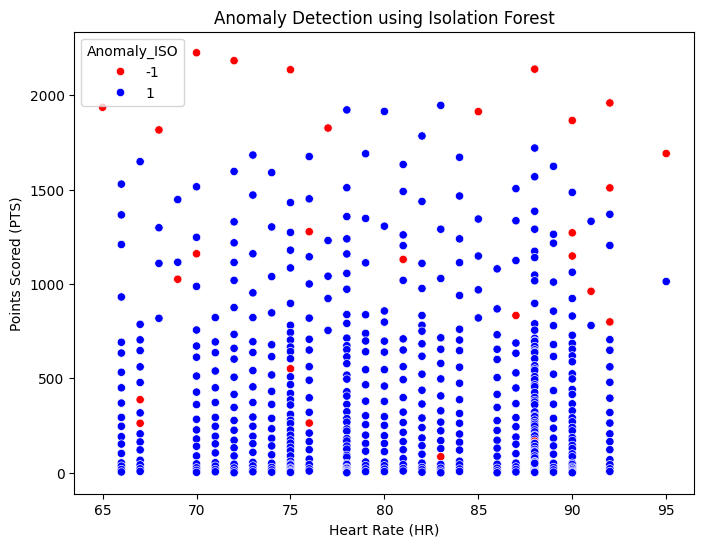

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HR', y='PTS', hue='Anomaly_ISO', data=data, palette={1: "blue", -1: "red"})
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Heart Rate (HR)")
plt.ylabel("Points Scored (PTS)")
plt.show()

In [9]:
anomalies=data[data['Anomaly_ISO']== -1]
print("Detected Anomalies:\n",anomalies)

Detected Anomalies:
                        PName POS Team  Age  GP   W   L     Min   PTS  FGM  \
0               Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727   
1                Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728   
2                Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719   
3    Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704   
4      Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707   
6              Julius Randle  PF  NYK   28  77  44  33  2737.3  1936  658   
9                Zach LaVine  SG  CHI   28  77  38  39  2767.9  1913  673   
10            Damian Lillard  PG  POR   32  58  27  31  2106.6  1866  556   
11              De'Aaron Fox  PG  SAC   25  73  44  29  2435.2  1826  682   
12             DeMar DeRozan  SF  CHI   33  74  37  37  2681.6  1816  657   
15           Lauri Markkanen  PF  UTA   25  66  32  34  2272.5  1691  571   
29             Klay Thompson  SG  GSW   33  69  38  31 